In [15]:
# these four lines of code were adapted from https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
# this code is intended to make results reproducible by seeding the random number generator
from numpy.random import seed
seed(1)
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [1]:
# import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Resizing
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
print(tf.__version__)

2.13.0


In [3]:
tf.__version__

'2.13.0'

In [4]:
# create a training set of the data representing 75% of the images
img_train = image_dataset_from_directory('./hotdog_nothotdog',  
                                         validation_split = 0.25,
                                         image_size = (299, 299),
                                         subset = 'training', 
                                         seed = 42)

# create a test set of the representing 25% of the images
img_test = image_dataset_from_directory('./hotdog_nothotdog', 
                                         validation_split = 0.25,
                                         image_size = (299, 299),
                                         subset = 'validation', 
                                         seed = 42)

Found 3645 files belonging to 2 classes.
Using 2734 files for training.
Found 3645 files belonging to 2 classes.
Using 911 files for validation.


In [17]:
img_train.class_names

['hotdog', 'nothotdog']

In [28]:
# instantiates sequential baseline model
model_base = Sequential()

# rescales 
model_base.add(Rescaling(1./255))

# make a convolutional layer with 16 filters and MaxPool the results
model_base.add(Conv2D(16, 3, activation='relu', input_shape=(-1, 299, 299, 3)))
model_base.add(MaxPooling2D(2))

# flattens the output and makes a predictions
model_base.add(Flatten())
model_base.add(Dense(1, activation='sigmoid'))

In [29]:
model_base.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)

In [30]:
res_base = model_base.fit(
    img_train,
    validation_data=(img_test),
    batch_size=512,
    epochs=10
)

Epoch 1/10
86/86 [==============================] - 20s 227ms/step - loss: 1.2278 - acc: 0.6386 - val_loss: 0.7014 - val_acc: 0.5818
Epoch 2/10
86/86 [==============================] - 20s 232ms/step - loss: 0.4929 - acc: 0.7634 - val_loss: 0.5924 - val_acc: 0.7003
Epoch 3/10
86/86 [==============================] - 21s 248ms/step - loss: 0.3353 - acc: 0.8683 - val_loss: 0.6771 - val_acc: 0.6773
Epoch 4/10
86/86 [==============================] - 20s 237ms/step - loss: 0.2017 - acc: 0.9382 - val_loss: 0.6640 - val_acc: 0.6894
Epoch 5/10
86/86 [==============================] - 21s 238ms/step - loss: 0.1039 - acc: 0.9795 - val_loss: 0.7455 - val_acc: 0.6959
Epoch 6/10
86/86 [==============================] - 21s 246ms/step - loss: 0.0617 - acc: 0.9923 - val_loss: 0.8268 - val_acc: 0.6839
Epoch 7/10
86/86 [==============================] - 21s 245ms/step - loss: 0.0329 - acc: 0.9985 - val_loss: 0.9408 - val_acc: 0.6685
Epoch 8/10
86/86 [==============================] - 22s 257ms/step - 

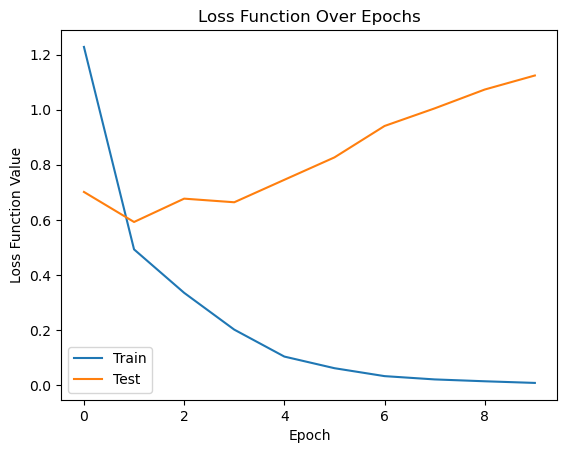

In [31]:
plt.plot(res_base.history['loss'], label = 'Train')
plt.plot(res_base.history['val_loss'], label = 'Test')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value')
plt.legend();

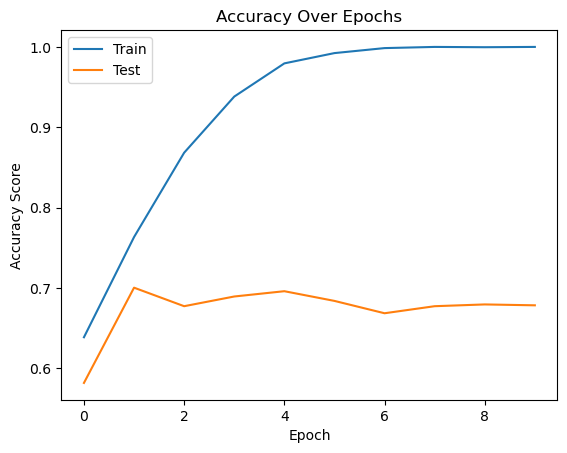

In [32]:
plt.plot(res_base.history['acc'], label = 'Train')
plt.plot(res_base.history['val_acc'], label = 'Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend();

In [34]:
# instantiates sequential baseline model
model_1 = Sequential()

# rescales 
model_1.add(Rescaling(1./255))

# make a convolutional layer with 16 nodes and MaxPool the results
model_1.add(Conv2D(16, 3, activation='relu', input_shape=(-1, 299, 299, 3)))
model_1.add(MaxPooling2D(2))

# make a dense layer with 32 nodes and MaxPool the results
model_1.add(Dense(32, activation='relu'))

# make a convolutional layer with 16 nodes and MaxPool the results
model_1.add(Conv2D(64, 3, activation='relu')))
model_1.add(MaxPooling2D(2))

# flattens the output and makes a predictions
model_1.add(Flatten())
model_1.add(Dense(1, activation='sigmoid'))

In [35]:
model_1.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)

In [36]:
res_1 = model_1.fit(
    img_train,
    validation_data=(img_test),
    batch_size=512,
    epochs=10
)

Epoch 1/10
86/86 [==============================] - 61s 701ms/step - loss: 0.7258 - acc: 0.6313 - val_loss: 0.6081 - val_acc: 0.6652
Epoch 2/10
86/86 [==============================] - 65s 752ms/step - loss: 0.5614 - acc: 0.7114 - val_loss: 0.5960 - val_acc: 0.6970
Epoch 3/10
86/86 [==============================] - 65s 753ms/step - loss: 0.4836 - acc: 0.7736 - val_loss: 0.5942 - val_acc: 0.6992
Epoch 4/10
86/86 [==============================] - 71s 822ms/step - loss: 0.3499 - acc: 0.8552 - val_loss: 0.6184 - val_acc: 0.6937
Epoch 5/10
86/86 [==============================] - 71s 826ms/step - loss: 0.2020 - acc: 0.9294 - val_loss: 0.7774 - val_acc: 0.6751
Epoch 6/10
86/86 [==============================] - 72s 835ms/step - loss: 0.1131 - acc: 0.9674 - val_loss: 1.0355 - val_acc: 0.6850
Epoch 7/10
86/86 [==============================] - 78s 903ms/step - loss: 0.0465 - acc: 0.9901 - val_loss: 1.2664 - val_acc: 0.6740
Epoch 8/10
86/86 [==============================] - 82s 958ms/step - 

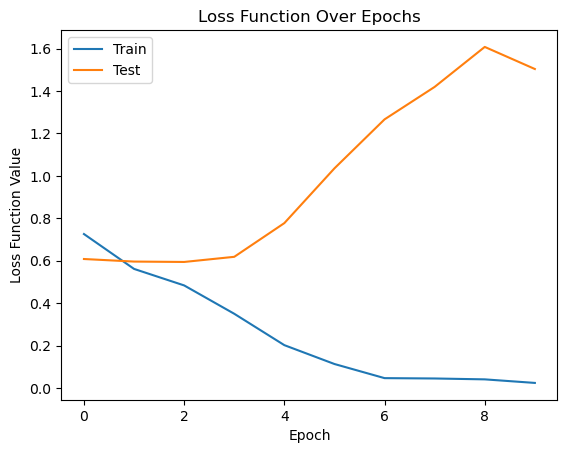

In [37]:
plt.plot(res_1.history['loss'], label = 'Train')
plt.plot(res_1.history['val_loss'], label = 'Test')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value')
plt.legend();

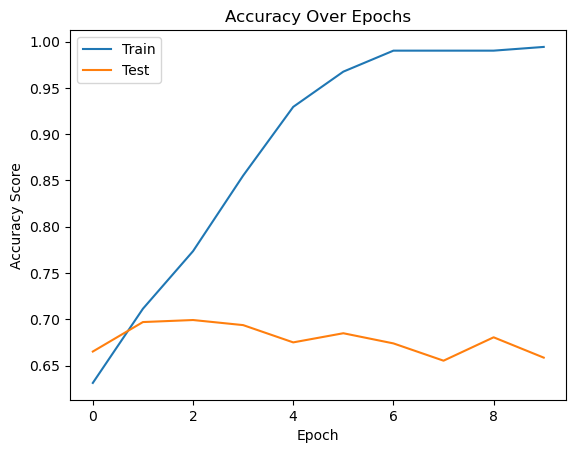

In [38]:
plt.plot(res_1.history['acc'], label = 'Train')
plt.plot(res_1.history['val_acc'], label = 'Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend();

In [40]:
# instantiates sequential baseline model
model_2 = Sequential()

# rescales 
model_2.add(Rescaling(1./255))

# make a convolutional layer with 16 nodes and MaxPool the results
model_2.add(Conv2D(16, 3, activation='relu', input_shape=(-1, 299, 299, 3), kernel_regularizer = l1(0.1)))
model_2.add(MaxPooling2D(2))

# make a dense layer with 32 nodes and MaxPool the results
model_2.add(Dense(32, activation='relu', kernel_regularizer = l1(0.1)))

# make a convolutional layer with 16 nodes and MaxPool the results
model_2.add(Conv2D(64, 3, activation='relu', kernel_regularizer = l1(0.1)))
model_2.add(MaxPooling2D(2))

# flattens the output and makes a predictions
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

In [41]:
model_2.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)

In [42]:
res_2 = model_2.fit(
    img_train,
    validation_data=(img_test),
    batch_size=512,
    epochs=10
)

Epoch 1/10
86/86 [==============================] - 68s 790ms/step - loss: 38.2811 - acc: 0.5881 - val_loss: 9.4866 - val_acc: 0.5236
Epoch 2/10
86/86 [==============================] - 66s 769ms/step - loss: 6.2325 - acc: 0.5669 - val_loss: 4.0367 - val_acc: 0.4984
Epoch 3/10
86/86 [==============================] - 68s 796ms/step - loss: 2.7269 - acc: 0.5102 - val_loss: 1.6955 - val_acc: 0.4984
Epoch 4/10
86/86 [==============================] - 69s 801ms/step - loss: 1.2502 - acc: 0.4920 - val_loss: 0.9914 - val_acc: 0.5016
Epoch 5/10
86/86 [==============================] - 68s 790ms/step - loss: 0.9488 - acc: 0.4993 - val_loss: 0.9279 - val_acc: 0.5016
Epoch 6/10
86/86 [==============================] - 74s 860ms/step - loss: 0.9272 - acc: 0.4993 - val_loss: 0.9281 - val_acc: 0.5016
Epoch 7/10
86/86 [==============================] - 79s 921ms/step - loss: 0.9273 - acc: 0.4993 - val_loss: 0.9268 - val_acc: 0.5016
Epoch 8/10
86/86 [==============================] - 85s 994ms/step -

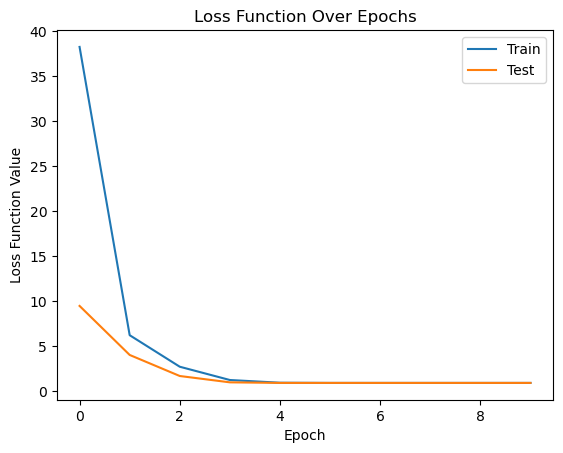

In [43]:
plt.plot(res_2.history['loss'], label = 'Train')
plt.plot(res_2.history['val_loss'], label = 'Test')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value')
plt.legend();

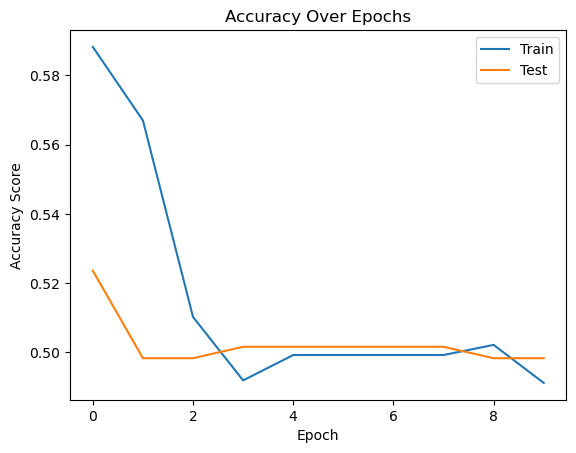

In [44]:
plt.plot(res_2.history['acc'], label = 'Train')
plt.plot(res_2.history['val_acc'], label = 'Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend();

In [14]:
# instantiates sequential baseline model
model_3 = Sequential()

model_3.add(Resizing(299, 299))

# rescales 
model_3.add(Rescaling(1./255))

# make a convolutional layer with 16 nodes and MaxPool the results
model_3.add(Conv2D(16, 3, activation='relu', input_shape=(-1, 299, 299, 3), kernel_regularizer = l1(0.05)))
model_3.add(MaxPooling2D(2))

# make a convolutional layer with 16 nodes and MaxPool the results
model_3.add(Conv2D(64, 3, activation='relu', kernel_regularizer = l1(0.05)))
model_3.add(MaxPooling2D(2))

# flattens the output and makes a predictions
model_3.add(Flatten())
model_3.add(Dense(1, activation='sigmoid'))

In [13]:
model_3.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)

In [7]:
res_3 = model_3.fit(
    img_train,
    validation_data=(img_test),
    batch_size=512,
    epochs=10
)

Epoch 1/10
86/86 [==============================] - 41s 474ms/step - loss: 10.9583 - acc: 0.6423 - val_loss: 2.8668 - val_acc: 0.6465
Epoch 2/10
86/86 [==============================] - 47s 548ms/step - loss: 1.7903 - acc: 0.6456 - val_loss: 1.2839 - val_acc: 0.5675
Epoch 3/10
86/86 [==============================] - 50s 581ms/step - loss: 1.1137 - acc: 0.6565 - val_loss: 0.9986 - val_acc: 0.6224
Epoch 4/10
86/86 [==============================] - 53s 614ms/step - loss: 0.9148 - acc: 0.6514 - val_loss: 0.8601 - val_acc: 0.6191
Epoch 5/10
86/86 [==============================] - 51s 591ms/step - loss: 0.8049 - acc: 0.6598 - val_loss: 0.8014 - val_acc: 0.6334
Epoch 6/10
86/86 [==============================] - 50s 583ms/step - loss: 0.7563 - acc: 0.6642 - val_loss: 0.7649 - val_acc: 0.6334
Epoch 7/10
86/86 [==============================] - 53s 613ms/step - loss: 0.7445 - acc: 0.6672 - val_loss: 0.7587 - val_acc: 0.6279
Epoch 8/10
86/86 [==============================] - 60s 694ms/step -

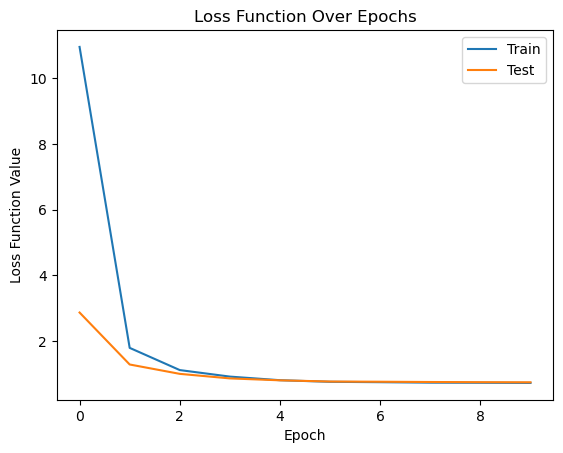

In [9]:
plt.plot(res_3.history['loss'], label = 'Train')
plt.plot(res_3.history['val_loss'], label = 'Test')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Function Value')
plt.legend();

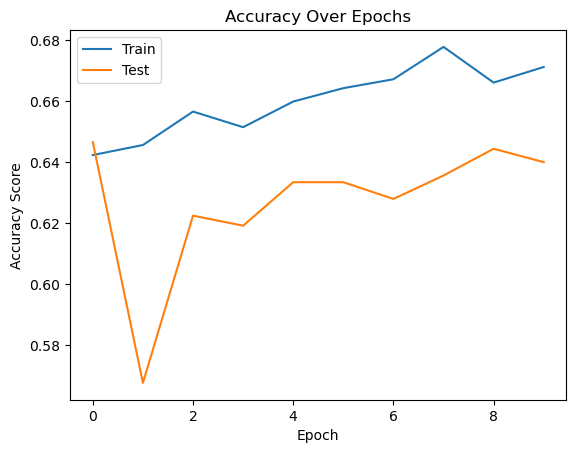

In [10]:
plt.plot(res_3.history['acc'], label = 'Train')
plt.plot(res_3.history['val_acc'], label = 'Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.legend();

In [11]:
model_3.save('./models/model_3.h5')